In [79]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
# 绘图
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
df = pd.read_excel(r'./Sheet12.xlsx', sheet_name=0)
df.fillna(0, inplace=True)

In [80]:
df

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),文物编号,纹饰,类型,颜色,表面风化
0,01,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,1,3,1,2,0
1,02,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00,2,1,2,1,1
2,03部位1,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,3,1,1,2,0
3,03部位2,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,3,1,1,2,0
4,04,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,4,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,54严重风化点,17.11,0.00,0.00,0.00,1.11,3.65,0.00,1.34,58.46,0.00,14.13,1.12,0.0,0.00,54,3,2,1,1
65,55,49.01,2.71,0.00,1.13,0.00,1.45,0.00,0.86,32.92,7.95,0.35,0.00,0.0,0.00,55,3,2,4,0
66,56,29.15,0.00,0.00,1.21,0.00,1.85,0.00,0.79,41.25,15.45,2.54,0.00,0.0,0.00,56,3,2,2,1
67,57,25.42,0.00,0.00,1.31,0.00,2.18,0.00,1.16,45.10,17.30,0.00,0.00,0.0,0.00,57,3,2,2,1


In [81]:
df = df.drop(columns=['文物采样点','文物编号','纹饰','颜色','表面风化'])
df


,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),类型
0,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,1
1,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00,2
2,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,1
3,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,1
4,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,17.11,0.00,0.00,0.00,1.11,3.65,0.00,1.34,58.46,0.00,14.13,1.12,0.0,0.00,2
65,49.01,2.71,0.00,1.13,0.00,1.45,0.00,0.86,32.92,7.95,0.35,0.00,0.0,0.00,2
66,29.15,0.00,0.00,1.21,0.00,1.85,0.00,0.79,41.25,15.45,2.54,0.00,0.0,0.00,2
67,25.42,0.00,0.00,1.31,0.00,2.18,0.00,1.16,45.10,17.30,0.00,0.00,0.0,0.00,2


In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.feature_extraction import DictVectorizer
import pandas as pd
x = df[['二氧化硅(SiO2)','氧化钠(Na2O)','氧化钾(K2O)','氧化钙(CaO)','氧化镁(MgO)','氧化铝(Al2O3)','氧化铁(Fe2O3)','氧化铜(CuO)','氧化铅(PbO)'	,'氧化钡(BaO)'	,'五氧化二磷(P2O5)'	,'氧化锶(SrO)',	'氧化锡(SnO2)','二氧化硫(SO2)']]
y = df['类型']
# 将类别标签转换为字符串类型
y = y.astype(str)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [83]:

# 用决策树进行预测
dec = DecisionTreeClassifier()

dec.fit(x_train, y_train)
print("预测的准确率为：", dec.score(x_test, y_test))


预测的准确率为： 1.0


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import pydotplus
from IPython.display import Image

# 导出决策树为Graphviz格式
export_graphviz(
    dec,
    out_file="tree.dot",
    feature_names=x.columns,
    class_names=y.unique(),
    filled=True,
    rounded=True,
    special_characters=True,
    fontname="SimHei",  # 添加此行，使用SimHei字体
)

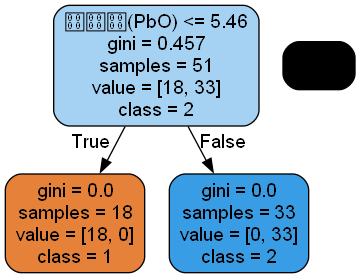

In [85]:

# 将Graphviz文件转换为图形或查看器中的可视化结果
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(dec, out_file=None, feature_names=x.columns, class_names=y.astype(str).unique(), filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [86]:
df1 = df[df["类型"]==1]
df2 = df[df["类型"]==2]
df1 = df1.drop(columns='类型')
df2 = df2.drop(columns='类型')
df1

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.00,0.39
2,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.00,0.00
3,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.00,0.00
4,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.00,0.36
5,61.58,0.00,10.95,7.35,1.77,7.50,2.62,3.27,0.00,0.00,0.94,0.06,0.00,0.47
6,67.65,0.00,7.37,0.00,1.98,11.15,2.39,2.51,0.20,1.38,4.18,0.11,0.00,0.00
7,59.81,0.00,7.68,5.41,1.73,10.05,6.04,2.18,0.35,0.97,4.50,0.12,0.00,0.00
8,92.63,0.00,0.00,1.07,0.00,1.98,0.17,3.24,0.00,0.00,0.61,0.00,0.00,0.00
11,95.02,0.00,0.59,0.62,0.00,1.32,0.32,1.55,0.00,0.00,0.35,0.00,0.00,0.00
12,96.77,0.00,0.92,0.21,0.00,0.81,0.26,0.84,0.00,0.00,0.00,0.00,0.00,0.00


In [87]:
# 主成分分析降维
 
# Bartlett's球状检验
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value = calculate_bartlett_sphericity(df1)
print(f"Bartlett's球状检验:\n{chi_square_value, p_value}")
# <0.05推荐使用主成分分析

Bartlett's球状检验:
(265.91868820502964, 4.85927845978013e-19)


In [88]:
# KMO检验
# 检查变量间的相关性和偏相关性，取值在0-1之间；KOM统计量越接近1，变量间的相关性越强，偏相关性越弱，因子分析的效果越好。
# 通常取值从0.6开始进行因子分析
from factor_analyzer.factor_analyzer import calculate_kmo
 
kmo_all, kmo_model = calculate_kmo(df1)
print(f"KMO检验:\n{kmo_model}")

KMO检验:
0.36652140109115583


C:\Users\ease\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [89]:
faa = FactorAnalyzer(25,rotation=None)
faa.fit(df1)
 
# 得到特征值ev、特征向量v
ev,v=faa.get_eigenvalues()
ev,v


(array([5.40017025e+00, 2.43030060e+00, 1.71538498e+00, 1.64881132e+00,
        9.48547322e-01, 6.44206607e-01, 5.13197690e-01, 3.02407681e-01,
        1.94931487e-01, 1.11292103e-01, 6.08812534e-02, 1.80827509e-02,
        7.14070496e-03, 4.64524676e-03]),
 array([ 5.39519829e+00,  2.42532471e+00,  1.71041415e+00,  1.64383278e+00,
         9.43564159e-01,  6.39226899e-01,  5.08229192e-01,  2.97430106e-01,
         1.89942431e-01,  1.06315025e-01,  5.59102597e-02,  1.31116867e-02,
         2.16177844e-03, -3.06708940e-04]))

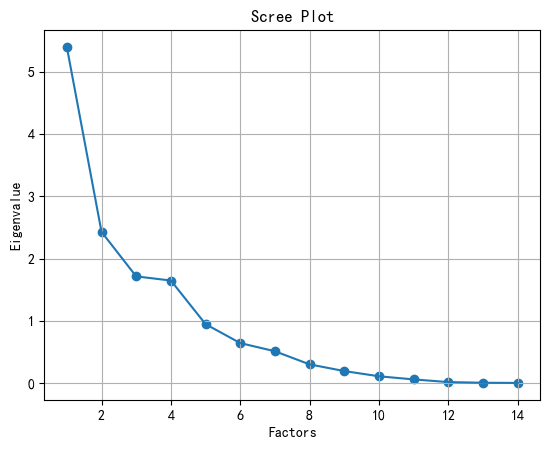

In [90]:
# 同样的数据绘制散点图和折线图
plt.scatter(range(1, df1.shape[1] + 1), ev)
plt.plot(range(1, df1.shape[1] + 1), ev)
 
# 显示图的标题和xy轴的名字
# 最好使用英文，中文可能乱码
plt.title("Scree Plot")  
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
 
plt.grid()  # 显示网格
plt.show()  # 显示图形

In [91]:
# 选择方式： varimax 方差最大化
faa_two = FactorAnalyzer(4,rotation='varimax')
faa_two.fit(df1)
# 公因子方差
faa_two.get_communalities()

array([0.89680406, 0.75931256, 0.8064655 , 0.76558532, 0.72718655,
       0.69425542, 0.71132521, 0.61263666, 0.56437912, 0.90351852,
       0.72928537, 0.83740512, 0.31898578, 0.7446696 ])

In [92]:
# 公因子方差
faa_two.get_communalities()

array([0.89680406, 0.75931256, 0.8064655 , 0.76558532, 0.72718655,
       0.69425542, 0.71132521, 0.61263666, 0.56437912, 0.90351852,
       0.72928537, 0.83740512, 0.31898578, 0.7446696 ])

In [93]:
# 变量个数*因子个数
faa_two.loadings_

array([[-0.44111965, -0.81830306, -0.18049359,  0.00443674],
       [-0.34179467,  0.75180584, -0.12974677,  0.24585099],
       [ 0.30357617,  0.83741332,  0.04124859, -0.10651048],
       [ 0.11792737,  0.66933229,  0.52720179, -0.16040886],
       [ 0.8106507 ,  0.21421276, -0.06327528, -0.14191944],
       [ 0.66360819,  0.4486723 ,  0.21830365,  0.07011614],
       [ 0.7073204 ,  0.22124394,  0.39808245, -0.06003779],
       [ 0.2673481 ,  0.07991757,  0.73013069, -0.04103668],
       [ 0.13209329,  0.34078174,  0.2842946 ,  0.59158674],
       [ 0.56401067, -0.09977551,  0.47823971,  0.58884813],
       [ 0.85315268, -0.0350744 ,  0.0105902 ,  0.0085736 ],
       [ 0.89559847,  0.07288334, -0.07449226,  0.1563567 ],
       [ 0.18350718, -0.03915738, -0.53098861, -0.04276315],
       [ 0.15466807,  0.18075352,  0.31906049, -0.76568659]])

In [94]:
faa_two.get_factor_variance()

(array([4.00990292, 2.85346303, 1.77122244, 1.43722638]),
 array([0.28642164, 0.20381879, 0.12651589, 0.10265903]),
 array([0.28642164, 0.49024043, 0.61675631, 0.71941534]))

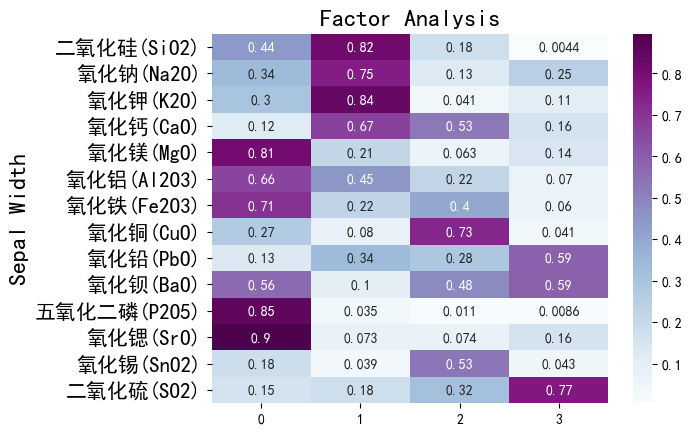

In [95]:
df3 = pd.DataFrame(np.abs(faa_two.loadings_),index=df1.columns)
# 绘图
ax = sns.heatmap(df3, annot=True, cmap="BuPu")
 
# 设置y轴字体大小
ax.yaxis.set_tick_params(labelsize=15)
plt.title("Factor Analysis", fontsize="xx-large")
 
# 设置y轴标签
plt.ylabel("Sepal Width", fontsize="xx-large")
# 显示图片
plt.show()

In [96]:
data = pd.DataFrame(faa_two.transform(df1))
data

,0,1,2,3
0,0.085515,-0.130249,1.102985,-1.550842
1,-0.734776,0.039956,0.189143,0.119060
2,0.939398,0.231862,0.819556,1.348397
3,-0.008985,0.721406,-0.438400,-2.367071
4,0.898933,0.680939,1.407120,-1.667453
5,2.294280,-0.471319,-0.382575,0.825136
6,2.417724,0.024767,-0.288180,-0.168469
7,-0.692622,-0.813961,-0.282815,-0.602645
8,-0.665710,-1.367811,0.451881,0.446952
9,-0.801117,-1.576388,0.350838,0.627641


[[ 8.          9.          0.32357014  2.        ]
 [13.         15.          0.58726901  2.        ]
 [18.         19.          0.71563529  2.        ]
 [10.         20.          0.76882979  3.        ]
 [ 5.          6.          1.121383    2.        ]
 [ 0.          4.          1.19405636  2.        ]
 [ 1.          7.          1.21431212  2.        ]
 [12.         14.          1.32003103  2.        ]
 [21.         27.          1.73902181  4.        ]
 [23.         26.          1.86131289  5.        ]
 [11.         28.          2.13662721  5.        ]
 [16.         22.          2.19259904  3.        ]
 [ 3.         25.          2.27813074  3.        ]
 [ 2.         24.          2.47341034  3.        ]
 [29.         31.          4.00943945  8.        ]
 [17.         33.          4.63467305  4.        ]
 [30.         32.          5.35315503  8.        ]
 [34.         36.          5.63313152 16.        ]
 [35.         37.          6.37529283 20.        ]]


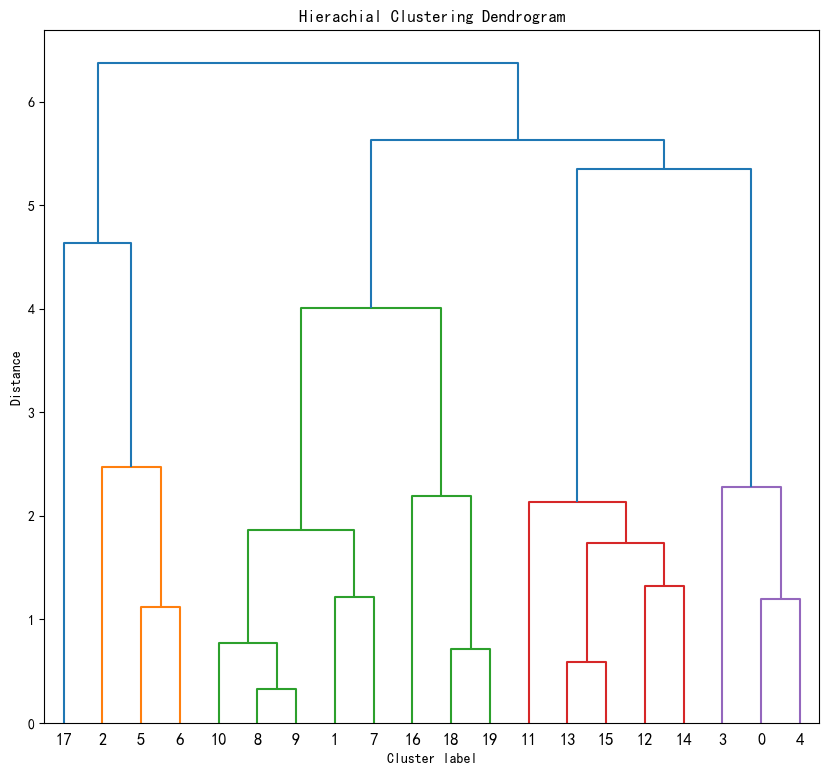

For n_clusters=2, the Silhouette Score is 0.27728958480018645
For n_clusters=3, the Silhouette Score is 0.24073361417222022
For n_clusters=4, the Silhouette Score is 0.3183543294038657
For n_clusters=5, the Silhouette Score is 0.33982823175317156
For n_clusters=6, the Silhouette Score is 0.3587341109787471
For n_clusters=7, the Silhouette Score is 0.33513299270029134
For n_clusters=8, the Silhouette Score is 0.3216051455744909
For n_clusters=9, the Silhouette Score is 0.31100732442038737
For n_clusters=10, the Silhouette Score is 0.28611029799694


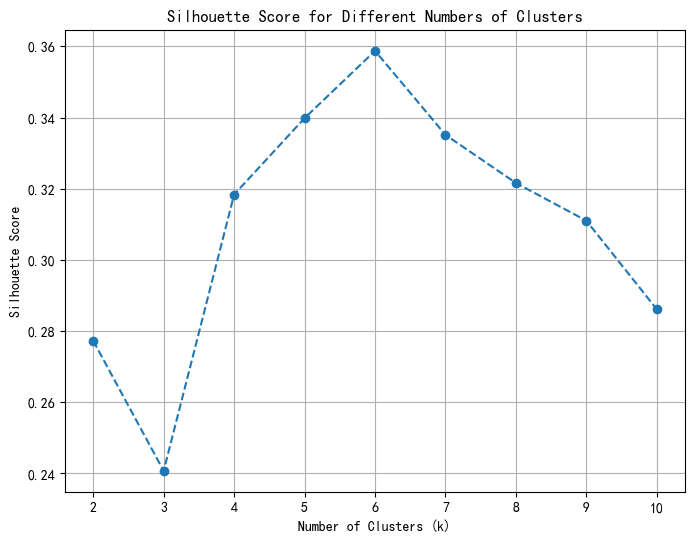

In [97]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score  # 导入Silhouette Score
# 层次聚类
z=linkage(data,"ward" ,metric='euclidean')
# 类间距离为最短距离，距离计算使用欧式距离
print(z) # 聚类过程

 #画聚类图
fig= plt.subplots(figsize=(10,9)) # 图片尺寸
dendrogram(z)
plt.title("Hierachial Clustering Dendrogram")
plt.xlabel("Cluster label")
plt.ylabel("Distance")
plt.show()

# 计算不同k值下的Silhouette Score
silhouette_scores = []
for k in range(2, 11):  # 从2到10尝试不同的k值
    cluster_labels = AgglomerativeClustering(n_clusters=k).fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters={k}, the Silhouette Score is {silhouette_avg}")

# 绘制Silhouette Score的曲线
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Numbers of Clusters")
plt.grid(True)
plt.show()

[[ 8.          9.          0.26841943  2.        ]
 [13.         15.          0.39110027  2.        ]
 [ 7.         10.          0.49707565  2.        ]
 [ 5.          6.          0.51985566  2.        ]
 [18.         19.          0.53351103  2.        ]
 [ 2.          4.          0.7406341   2.        ]
 [ 3.         21.          0.7602087   3.        ]
 [11.         14.          0.95189533  2.        ]
 [20.         22.          1.00809107  4.        ]
 [ 0.         25.          1.17713624  3.        ]
 [ 1.         26.          1.45824136  4.        ]
 [12.         27.          1.71022789  3.        ]
 [16.         24.          2.1237657   3.        ]
 [30.         31.          2.3570394   7.        ]
 [17.         29.          2.72323032  4.        ]
 [28.         32.          3.73893392  7.        ]
 [23.         34.          4.30954129  6.        ]
 [33.         35.          5.48145135 14.        ]
 [36.         37.          6.21809991 20.        ]]


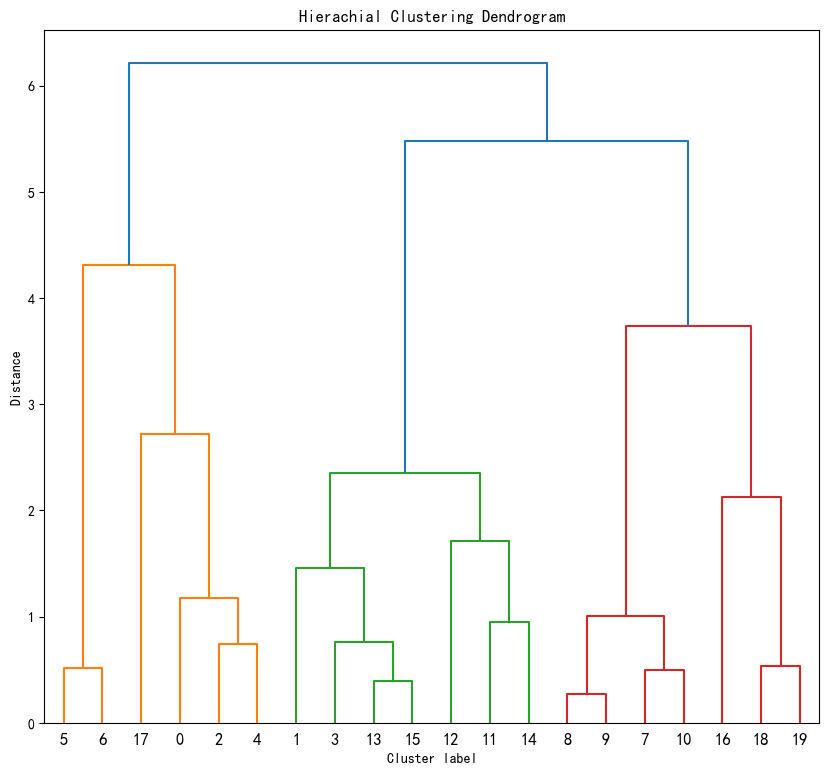

For n_clusters=2, the Silhouette Score is 0.29426981401052393
For n_clusters=3, the Silhouette Score is 0.33533428574213064
For n_clusters=4, the Silhouette Score is 0.4012658191699532
For n_clusters=5, the Silhouette Score is 0.42447674952663805
For n_clusters=6, the Silhouette Score is 0.42206880917856376
For n_clusters=7, the Silhouette Score is 0.4146782102882288
For n_clusters=8, the Silhouette Score is 0.42634490418983806
For n_clusters=9, the Silhouette Score is 0.426882908329343
For n_clusters=10, the Silhouette Score is 0.4069578948720121


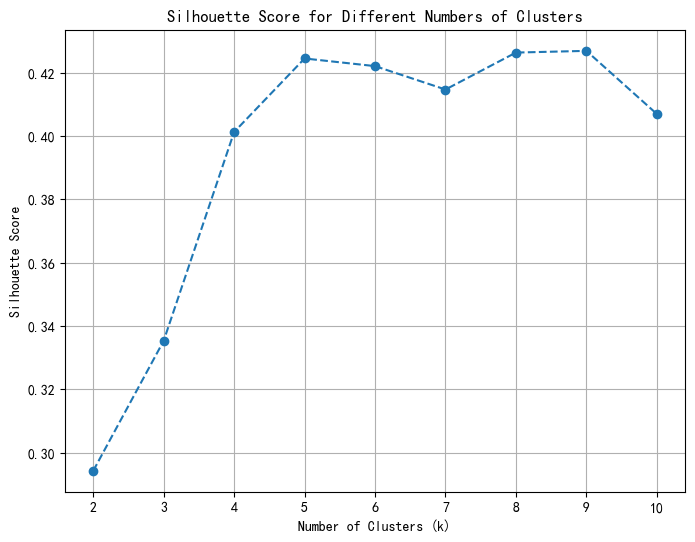

In [98]:
# 敏感性分析
data1 = data.drop([3],axis=1)
# 层次聚类
z=linkage(data1,"ward" ,metric='euclidean')
# 类间距离为最短距离，距离计算使用欧式距离
print(z) # 聚类过程

 #画聚类图
fig= plt.subplots(figsize=(10,9)) # 图片尺寸
dendrogram(z)
plt.title("Hierachial Clustering Dendrogram")
plt.xlabel("Cluster label")
plt.ylabel("Distance")
plt.show()

# 计算不同k值下的Silhouette Score
silhouette_scores = []
for k in range(2, 11):  # 从2到10尝试不同的k值
    cluster_labels = AgglomerativeClustering(n_clusters=k).fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters={k}, the Silhouette Score is {silhouette_avg}")

# 绘制Silhouette Score的曲线
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Numbers of Clusters")
plt.grid(True)
plt.show()